In [13]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import (
    cross_val_predict,
    cross_val_score,
    train_test_split
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

In [4]:
# DF initialization
df = pd.read_csv('./dataset.csv')
df['Drained_after_socializing'] = pd.Series(map(lambda x: x == 'Yes', df['Drained_after_socializing']))
df['Stage_fear'] = pd.Series(map(lambda x: x == 'Yes', df['Stage_fear']))
df['Personality'] = pd.Series(map(lambda x: x == 'Extrovert', df['Personality']))
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,False,4.0,6.0,False,13.0,5.0,True
1,9.0,True,0.0,0.0,True,0.0,3.0,False
2,9.0,True,1.0,2.0,True,5.0,2.0,False
3,0.0,False,6.0,7.0,False,14.0,8.0,True
4,3.0,False,9.0,4.0,False,8.0,5.0,True
...,...,...,...,...,...,...,...,...
2895,3.0,False,7.0,6.0,False,6.0,6.0,True
2896,3.0,False,8.0,3.0,False,14.0,9.0,True
2897,4.0,True,1.0,1.0,True,4.0,0.0,False
2898,11.0,True,1.0,3.0,True,2.0,0.0,False


In [5]:
# Separe train and test data
X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Just an example default model
classifier = DecisionTreeClassifier()
cross_val_score(classifier, X_train, y_train, cv=5)

array([0.87715517, 0.88577586, 0.8987069 , 0.88362069, 0.91810345])


=== MÉTRICAS FINAIS NO TESTE ===
              precision    recall  f1-score   support

   Introvert   0.862069  0.899281  0.880282       278
   Extrovert   0.903448  0.867550  0.885135       302

    accuracy                       0.882759       580
   macro avg   0.882759  0.883415  0.882708       580
weighted avg   0.883615  0.882759  0.882809       580



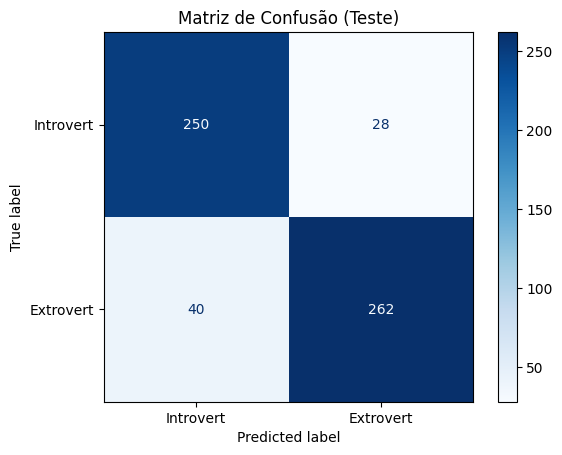

In [16]:
# Final validation (with TEST database)
final_classifier = DecisionTreeClassifier()
final_classifier.fit(X_train, y_train)
y_pred_test = final_classifier.predict(X_test)

print("\n=== MÉTRICAS FINAIS NO TESTE ===")
print(classification_report(y_test, y_pred_test, target_names=['Introvert', 'Extrovert'], digits=6))

# === 7. Matriz de confusão ===
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introvert', 'Extrovert'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão (Teste)")
plt.show()